# 0. Review
## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users to access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of antibiotic resistance in bacteria strains. 

- Each bacteria is labeled with its resistance to the antibiotic, azithromycin.
- Additionally, each bacteria sample is labelled if its genome contains certain strands of DNA.

We would like to learn antibiotic resistance from the bacterial genome. 

- Our predictors are whether strands of DNA are present.
- Our response are resistance classes.

First, we have to clean our data up. **This section will focus on data preprocessing.**


## 0.C Data Preprocessing

We did a bit of data preprocessing: 

- encoded the resistance feature as 0 - "resistant," 1 - "susceptible".
- encoded all features of the DNA strands as, 0 - "if its genome does not contain the strand of DNA", 1 - "if its genome contains the strand of DNA."
- standardized dataset of presence of DNA strands


## 0.C Data Reduction

We also reduce our dataset to two and three dimensions using PCA



## 0.D Load Data

Now, we reduced our dataset. Run the code below to load 

- the dataset, ```antibiotic_resistance_encoded_labels```, containing antibotic resistance phentype for each bacteria
- the dataset, ```transformed_DNA_2d```, containing DNA data reduced to 2d using PCA
- and the dataset, ```transformed_DNA_3d```, containing DNA data reduced to 3d using PCA


In [3]:
import pandas as pd
antibiotic_resistance_all_labels = pd.read_csv('datasets/antibiotic_resistance_encoded_labels',
                                               index_col=0)
transformed_DNA_2d = pd.read_csv('datasets/transformed_DNA_2d',index_col=0)
transformed_DNA_3d = pd.read_csv('datasets/transformed_DNA_3d',index_col=0)

**In this section, we will be covering unsupervised learning.**

Recall that **unsupervised learning** is extracting structure from data (self-organized learning - find previously unknown patterns in data set without pre-existing labels).

# 8. Clustering: KMeans

Clustering is a means of grouping data points together based on their proximity to each other.

A popular technique of clustering data is KMeans. KMeans assigns data points to a cluster based on a data points distance to the closest cluster center (centroid).

How does KMeans decide cluster centers?

## 8.A KMeans Algorithm


Consider the point cloud of data,

<img src="images/08_KMeans_00.png" alt="Drawing" style="width: 200px;"/>

1) *Randomly give each data point a number 1 through 3*. Each number represents a cluster assignment.

<img src="images/08_KMeans_01.png" alt="Drawing" style="width: 200px;"/>


2a) *For each cluster assignment, compute the centroid (the center of the cluster)*. The centroid is the mean of corresponding data points coordinates.


<img src="images/08_KMeans_02.png" alt="Drawing" style="width: 200px;"/>

3a) Update cluster assignment by *assigning each data point to the nearest centroid*

<img src="images/08_KMeans_03.png" alt="Drawing" style="width: 200px;"/>

4) Repeat step (2a)
<img src="images/08_KMeans_04.png" alt="Drawing" style="width: 200px;"/>

 and step (2b) until the cluster assignments do not change.

<img src="images/08_KMeans_05.png" alt="Drawing" style="width: 200px;"/>



# 8.B When do we use clustering?

Clustering used to identify geometric groups in the data. 

For clustering to informative, you need to know some rough estimate of distinct groups in your data.

In our case, we expect two groups. 

Let's say we don't know which data points are resistance or susceptible. We use clustering then to identify groups of points that are close and distinguish between points that are far away.

**Note: coordinates must be meaningful to answer for clustering to be meaningful.**

**Note: clustering cannot tell which points are resistant or susceptible -- only that distinct groups *may* exist.**

## 8.C Clustering 2-D Projected Data

In the labelled 2-D projection data, we saw that a natural separation between identifies the resistance and susceptible class. However, there was some overlap.

Applying KMeans clustering, we would then expect two distinct groups separation with some inaccuracies where the susceptible and resistance classes overlap.

### I. Initialize ```KMeans``` object

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

### II. Fit KMeans object

In [5]:
kmeans.fit(transformed_DNA_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### III. Get cluster labels

In [6]:
cluster_labels = kmeans.labels_

###  IV. Plot clusters

Now, let's plot the plots and color them by cluster labels.

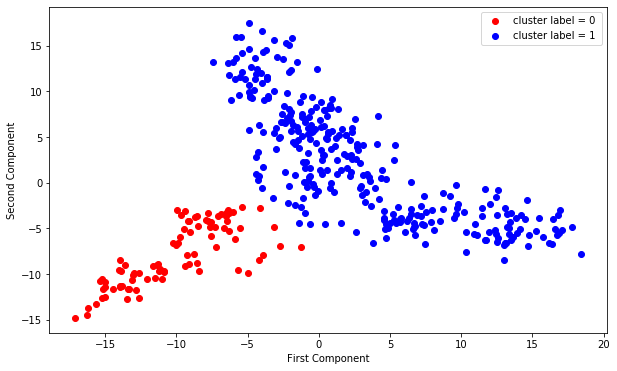

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

#plot suspectible strains

cluster_label_assignment_0 = [label == 0 for label in cluster_labels]

plt.scatter(transformed_DNA_2d.iloc[cluster_label_assignment_0, 0],
            transformed_DNA_2d.iloc[cluster_label_assignment_0, 1],
            label='cluster label = 0',
            c='r')

#plot resistant strains

cluster_label_assignment_1 = [label == 1 for label in cluster_labels]

plt.scatter(transformed_DNA_2d.iloc[cluster_label_assignment_1, 0],
            transformed_DNA_2d.iloc[cluster_label_assignment_1, 1],
            label='cluster label = 1 ',
            c='b')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

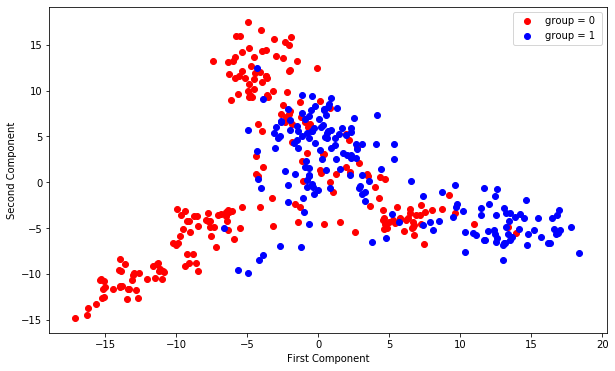

In [9]:
plt.figure(figsize=(10,6))

presence_0 = [element == 0 for element in antibiotic_resistance_all_labels.values.ravel()]

plt.scatter(transformed_DNA_2d.iloc[presence_0, 0],
            transformed_DNA_2d.iloc[presence_0, 1],
            label='group = 0 ',
            c='r')

#plot resistant strains

presence_1 = [element == 1 for element in antibiotic_resistance_all_labels.values.ravel()]

plt.scatter(transformed_DNA_2d.iloc[presence_1, 0],
            transformed_DNA_2d.iloc[presence_1, 1],
            label='group = 1 ',
            c='b')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

We can see that kMeans is able to be find some grouping. 

While kMeans is not 100% accurate, this is expected since, in two-dimensions, there is overlap between the two groups.

### 8.C.2 Exercise: Retrieving the centroid coordinates


```KMeans``` calculate the centroid centers and stores them as ```cluster_centers_```.

Retrieve these centers, ```kmeans.cluster_centers_```, store them as ```centers``` and run the code below to plot them.

In [10]:
#Enter solution here
centers =  kmeans.cluster_centers_

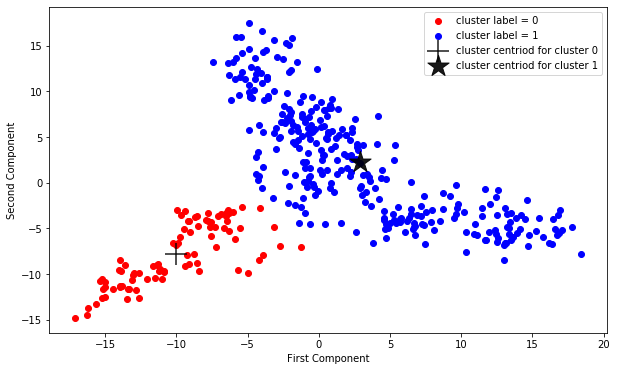

In [11]:
import matplotlib.pyplot as plt

#plot suspectible strains
plt.figure(figsize=(10,6))

cluster_label_assignment_0 = [label == 0 for label in cluster_labels]

plt.scatter(transformed_DNA_2d.iloc[cluster_label_assignment_0, 0],
            transformed_DNA_2d.iloc[cluster_label_assignment_0, 1],
            label='cluster label = 0',
            c='r')

#plot resistant strains

cluster_label_assignment_1 = [label == 1 for label in cluster_labels]

plt.scatter(transformed_DNA_2d.iloc[cluster_label_assignment_1, 0],
            transformed_DNA_2d.iloc[cluster_label_assignment_1, 1],
            label='cluster label = 1 ',
            c='b')

#plot centers


plt.scatter(*centers[0],s=500,alpha=0.9, marker='+',
            label="cluster centriod for cluster 0", color='k')
plt.scatter(*centers[1],s=500,alpha=0.9,  marker='*',
            label="cluster centriod for cluster 1",color='k')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.show()



### 8.C.3 Exercise: Predicting Cluster Assignment



```KMeans``` has a method ```predict``` calculate cluster assignment given the clusters learned from data. Predict the clusters of the follow points:

- (5,5)
-  (-10,5)
- (15,-5)
- (-1,-5)

 using ```kmeans.predict```.

In [12]:
#Enter solution here
# I've done the first one for you.
print(kmeans.predict([[5,5]]))


print(kmeans.predict([[-10,5]]))
print(kmeans.predict([[15,-5]]))
print(kmeans.predict([[-1,-5]]))

[1]
[0]
[1]
[1]


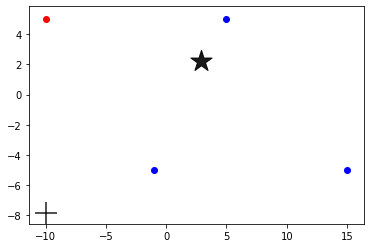

In [13]:
# add points with plots of centriods
import numpy as np

plt.scatter(*centers[0],s=500,alpha=0.9, marker='+',
            label="cluster centriod for cluster 0", color='k')
plt.scatter(*centers[1],s=500,alpha=0.9,  marker='*',
            label="cluster centriod for cluster 1",color='k')


test_points = np.array([[5,5],[-10,5],[15,-5],[-1,-5]])

clusters_ = kmeans.predict(test_points)

plt.scatter(test_points[clusters_==0, 0],
            test_points[clusters_==0, 1],
            c='r')

plt.scatter(test_points[clusters_==1, 0],
            test_points[clusters_==1, 1],
            c='b')
plt.show()

### 8.C.4 Transform Method

```KMeans``` has a ```transform``` method that will compute the distances of points from the centroid.

Using the points from the previous exercise,
- (5,5)
-  (-10,5)
- (15,-5)
- (-1,-5),

I compute the distance from the centroid.

In [14]:
test_points = np.array([[5,5],[-10,5],[15,-5],[-1,-5]])
kmeans.transform(test_points)

array([[19.76521314,  3.49401056],
       [12.85737281, 13.14846671],
       [25.17440587, 14.13922566],
       [ 9.45386984,  8.20386336]])

## 8.D Exercise: KMeans on 3-D Projected Data 

Following the process above compute 2 ```kMeans``` clusters for the 3-D dimensional data. Run the code below to plot the clusters.

In [15]:
# enter solution here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(transformed_DNA_3d)
cluster_labels = kmeans.labels_

<IPython.core.display.Javascript object>


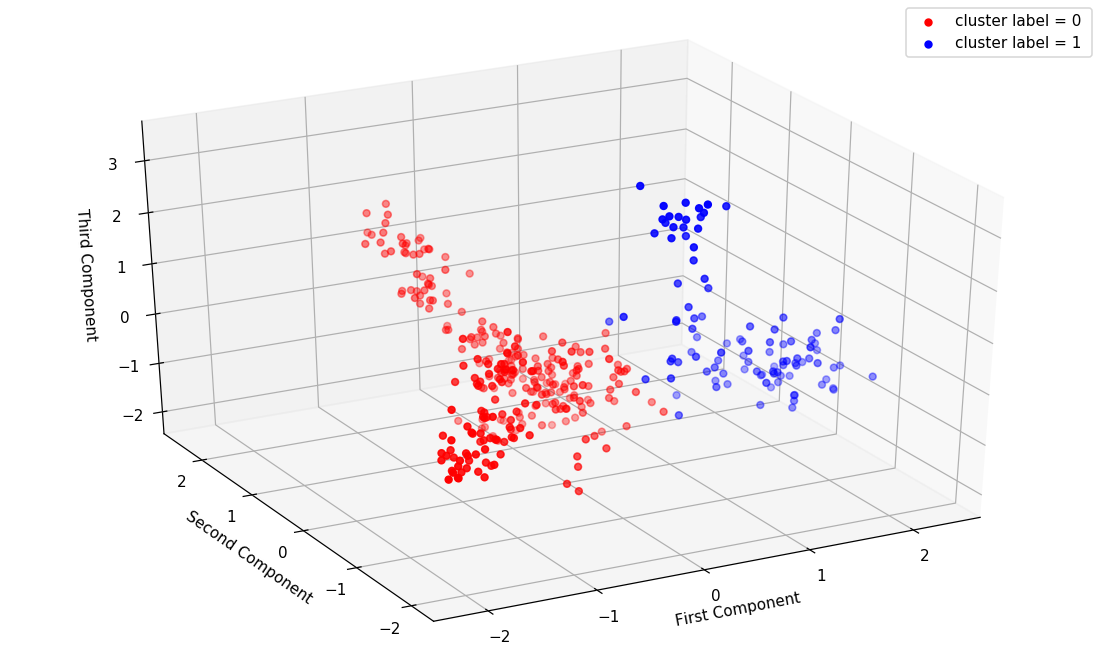

In [16]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

fig =  plt.figure(figsize=(10,6))
ax = Axes3D(fig)

#plot suspectible strains

cluster_label_assignment_0 = [label == 1 for label in cluster_labels]

ax.scatter(transformed_DNA_3d.iloc[cluster_label_assignment_0, 0],
           transformed_DNA_3d.iloc[cluster_label_assignment_0, 1],
           transformed_DNA_3d.iloc[cluster_label_assignment_0, 2],
           label='cluster label = 0 ',
           c='r')

#plot resistant strains

cluster_label_assignment_1 = [label == 0 for label in cluster_labels]

ax.scatter(transformed_DNA_3d.iloc[cluster_label_assignment_1, 0],
           transformed_DNA_3d.iloc[cluster_label_assignment_1, 1],
           transformed_DNA_3d.iloc[cluster_label_assignment_1, 2],
           label='cluster label = 1',
           c='b')

ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


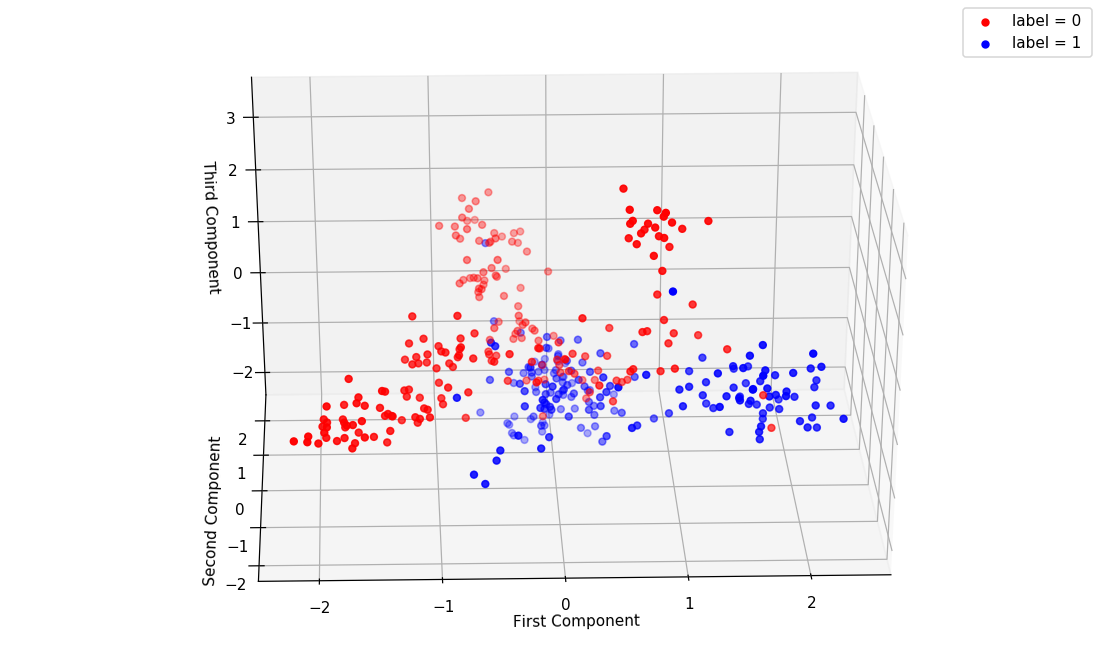

In [17]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

fig =  plt.figure(figsize=(10,6))
ax = Axes3D(fig)

#plot suspectible strains

presence_0 = [element == 0 for element in antibiotic_resistance_all_labels.values.ravel()]

ax.scatter(transformed_DNA_3d.iloc[presence_0, 0],
           transformed_DNA_3d.iloc[presence_0, 1],
           transformed_DNA_3d.iloc[presence_0, 2],
           label='label = 0 ',
           c='r')

#plot resistant strains

presence_1 = [element == 1 for element in antibiotic_resistance_all_labels.values.ravel()]

ax.scatter(transformed_DNA_3d.iloc[presence_1, 0],
           transformed_DNA_3d.iloc[presence_1, 1],
           transformed_DNA_3d.iloc[presence_1, 2],
           label='label = 1',
           c='b')

ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.legend()
plt.show()

### 8.D.1 Exercise: Retrieving the centroid coordinates


Retrieve these centers, ```kmeans.cluster_centers_```, store them as ```centers``` and run the code below to plot them.

In [18]:
# enter solution here
centers =  kmeans.cluster_centers_

<IPython.core.display.Javascript object>


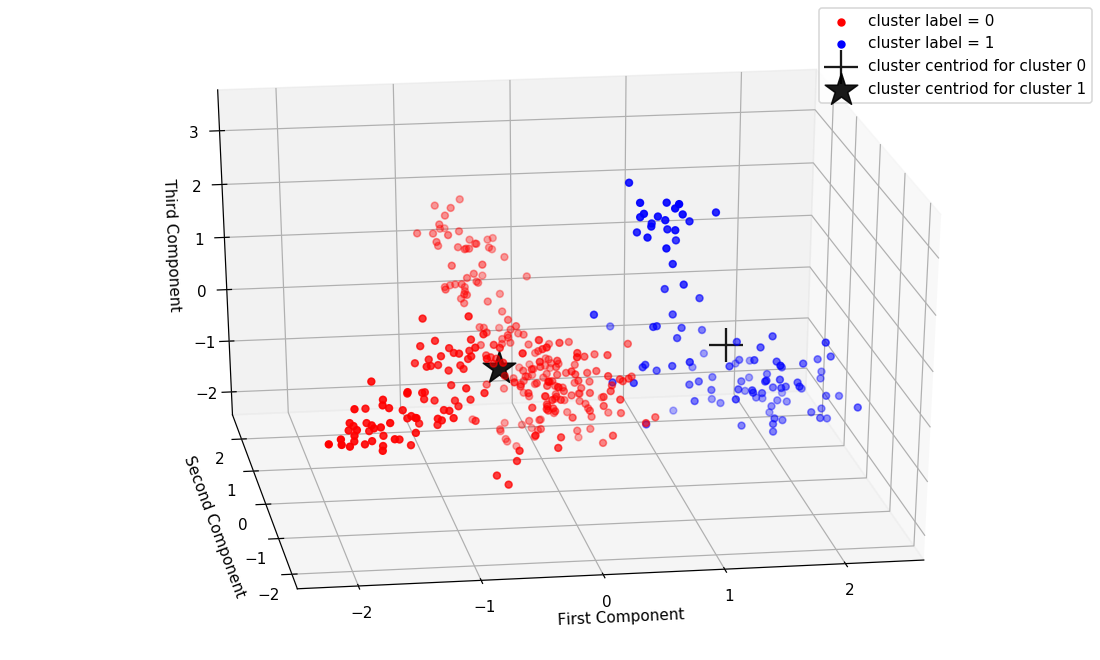

In [19]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

fig =  plt.figure(figsize=(10,6))
ax = Axes3D(fig)


#plot suspectible strains

cluster_label_assignment_0 = [label == 1 for label in cluster_labels]

ax.scatter(transformed_DNA_3d.iloc[cluster_label_assignment_0, 0],
           transformed_DNA_3d.iloc[cluster_label_assignment_0, 1],
           transformed_DNA_3d.iloc[cluster_label_assignment_0, 2],
           label='cluster label = 0 ',
           c='r')

#plot resistant strains

cluster_label_assignment_1 = [label == 0 for label in cluster_labels]

ax.scatter(transformed_DNA_3d.iloc[cluster_label_assignment_1, 0],
           transformed_DNA_3d.iloc[cluster_label_assignment_1, 1],
           transformed_DNA_3d.iloc[cluster_label_assignment_1, 2],
           label='cluster label = 1',
           c='b')

#plot centers


ax.scatter(*centers[0],s=500,alpha=0.9, marker='+',
            label="cluster centriod for cluster 0", color='k')
ax.scatter(*centers[1],s=500,alpha=0.9,  marker='*',
            label="cluster centriod for cluster 1",color='k')

ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.legend()
plt.show()

### 8.D.2 Exercise: Predicting Cluster Assignment


```KMeans``` has a method ```predict``` calculate cluster assignment given the clusters learned from data. Predict the clusters of the follow points:

- (-2,1,3)
-  (0,3,4)
- (1,1,-1)
- (2,0,-1.5)

 using ```kmeans.predict```.

In [20]:
#Enter solution here

print(kmeans.predict([[-2,1,3]]))
print(kmeans.predict([[0,3,4]]))
print(kmeans.predict([[1,1,-1]]))
print(kmeans.predict([[2,1,-1.5]]))

[1]
[1]
[1]
[0]


<IPython.core.display.Javascript object>


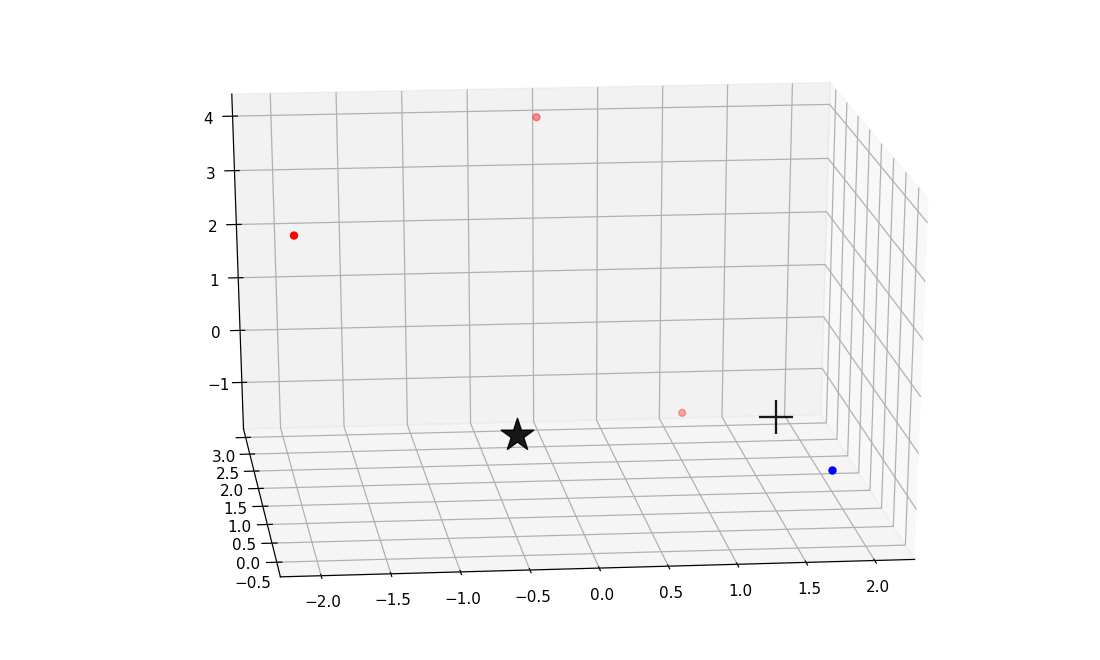

In [21]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib notebook

fig =  plt.figure(figsize=(10,6))
ax = Axes3D(fig)

import numpy as np

# plot tests points

test_points = np.array([[-2,1,3],[0,3,4],[1,2,-1],[2,1,-1.5]])

clusters_ = kmeans.predict(test_points)

ax.scatter(test_points[clusters_==1, 0],
           test_points[clusters_==1, 1],
           test_points[clusters_==1, 2],
            c='r')

ax.scatter(test_points[clusters_==0, 0],
           test_points[clusters_==0, 1],
           test_points[clusters_==0, 2],
            c='b')

# plot centroids

ax.scatter(*centers[0],s=500,alpha=0.9, marker='+',
            label="cluster centriod for cluster 0", color='k')
ax.scatter(*centers[1],s=500,alpha=0.9,  marker='*',
            label="cluster centriod for cluster 1",color='k')


plt.show()

In [22]:
# now look at the actual distance of the test points from centroids

kmeans.transform(test_points)

array([[4.4139745 , 3.63129298],
       [5.15921927, 5.05788589],
       [3.05314899, 2.4427061 ],
       [2.70172481, 2.89801893]])